<a href="https://colab.research.google.com/github/pe8sutd/DSL2025/blob/main/T01_Basys_3_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

## Logic gates review


Research into different logic gates and fill up the truth table below



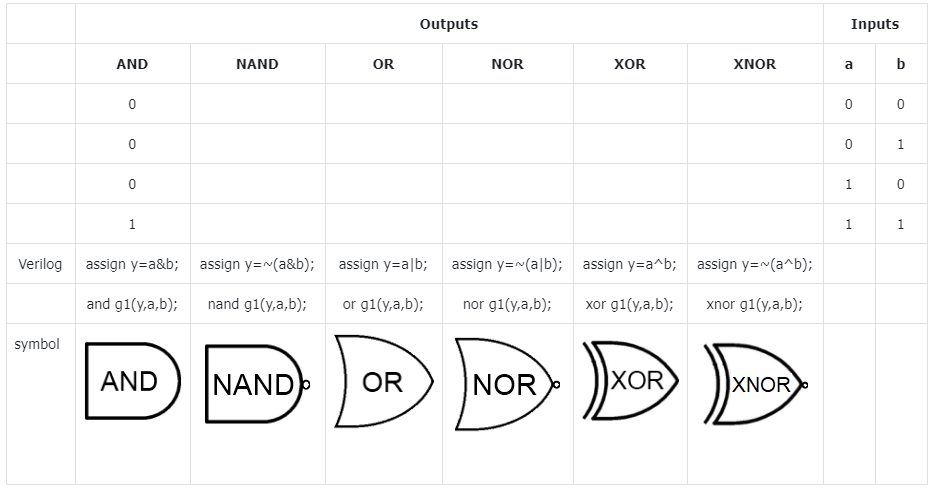

### Different ways of Verilog coding for the logic gates.

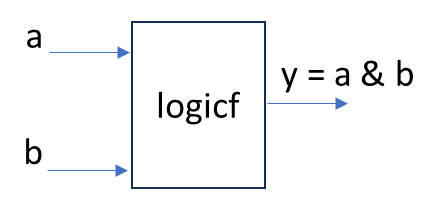

Installing. Please wait... done!


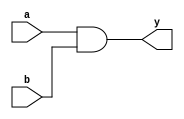

In [ ]:
%%print_verilog

//Structural Description
module logicf(y,a,b);
 input a,b;
 output y;

and g1 (y,a,b);

endmodule


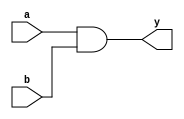

In [ ]:
%%print_verilog

//Behavioural Description 1
module logicf(y,a,b);
 input a,b;
 output y;

assign y = a & b;

endmodule


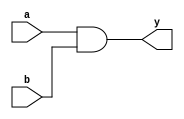

In [ ]:
%%print_verilog

//Behavioural Description 2
module logicf(y,a,b);
 input a,b;
 output y;
 reg y;

always @(a or b)
 y = a & b;

endmodule


The module has to be checked for functionality, thus a testbench is required to test the module.
Below is an example of a buffer Verilog module and testbench. A buffer has two inverters (not gate) in series.

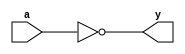

In [ ]:
%%print_verilog

//
module buf_top(y,a);
  output y;
  input a;

  assign y = ~a;

endmodule

In [ ]:
%%verilog

//
module buf_top(y,a);
  output y;
  input a;

  assign y = ~a;

endmodule

//
module tb;
  wire yt;
  reg at;

  buf_top dut1(yt,at);

  initial
    begin
    $dumpfile("tb.vcd");
    $dumpvars;

      at=0;
      #1 at=1;
      #1 at=0;
      #1 $finish;

    $dumpoff;
    end

endmodule


VCD info: dumpfile tb.vcd opened for output.



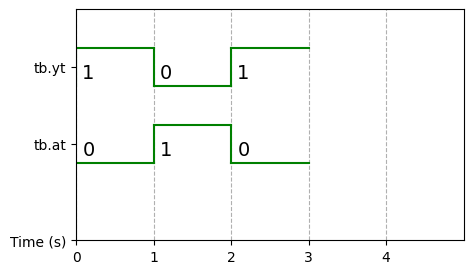

In [ ]:
%%waveform tb.vcd
sign_list = ['tb.yt','tb.at']
time_begin = 0
time_end = 4
base = 'dec' # bin, dec, dec2, hex, octal

## Quick Start with Basys 3.

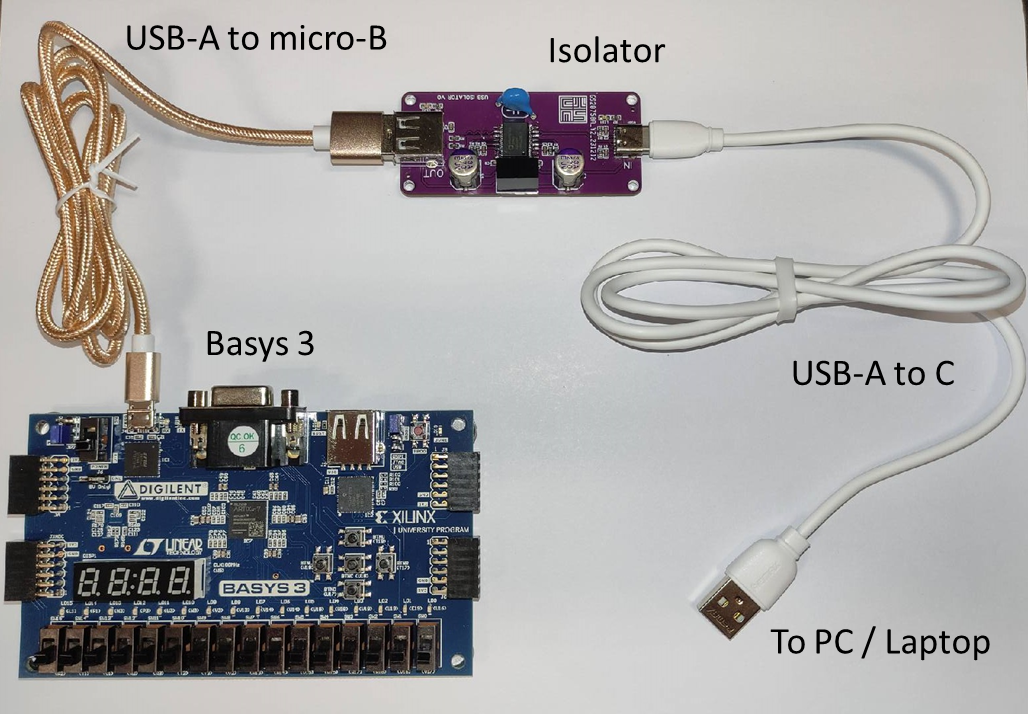

Figure 1. Basys 3 common setup for DSL

### Steps in Vivado Environment.

1. Using Basys 3 to revise the logic gate, e.g. AND, OR.

a. Install Vivado.

b. Create a project in Vivado and specify Basys 3 board.

c. In Google Colab: Write Verilog code for a two input AND gate, verify the functionality (waveform, monitor).

d. Copy the Verilog Code into Vivado, perform: synthesis, implementation, and experimentation to verify the logic gate using two switches as input, and one led as output.

e. What are you expecting to see for this AND gate, that implemented in the Basys 3 board? When will be the led turn on? by turn on the switches?

TABLE I: Truth Table for Two-Inputs AND Gate


Output | Input | Input       
-------|-------|-------
LDO    | SW1   | SW0
(U16)  | (V16) | (V17)
y      | a     | b
0      | 0     | 0
0      | 0     | 1
1      | 1     | 0
1      | 1     | 1


In [ ]:
%%verilog

//
module b3logic(y,a,b);
 output y;
 input a,b;

assign y = a & b;

endmodule

//
module tb;
 wire y;
 reg a,b;

b3logic dut(y,a,b);

initial
 begin
 $dumpfile("tb.vcd");
 $dumpvars;

  #0 a=0;b=0;
  #1 a=0;b=1;
  #1 a=1;b=0;
  #1 a=1;b=1;
  #1 $finish;

 $dumpoff;

 end

endmodule


VCD info: dumpfile tb.vcd opened for output.



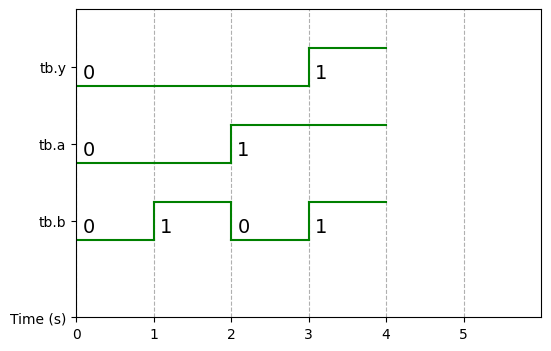

In [ ]:
%%waveform tb.vcd
sign_list = ['tb.y','tb.a','tb.b']
time_begin = 0
time_end = 5
base = 'dec' # bin, dec, dec2, hex, octal

### b3logic.xdc

In [ ]:
##input
set_property -dict { PACKAGE_PIN V17   IOSTANDARD LVCMOS33 } [get_ports b]
set_property -dict { PACKAGE_PIN V16   IOSTANDARD LVCMOS33 } [get_ports a]

##output
set_property -dict { PACKAGE_PIN U16   IOSTANDARD LVCMOS33 } [get_ports y]


2. Download the Basys 3 constrain file:

https://github.com/Digilent/digilent-xdc/blob/master/Basys-3-Master.xdc


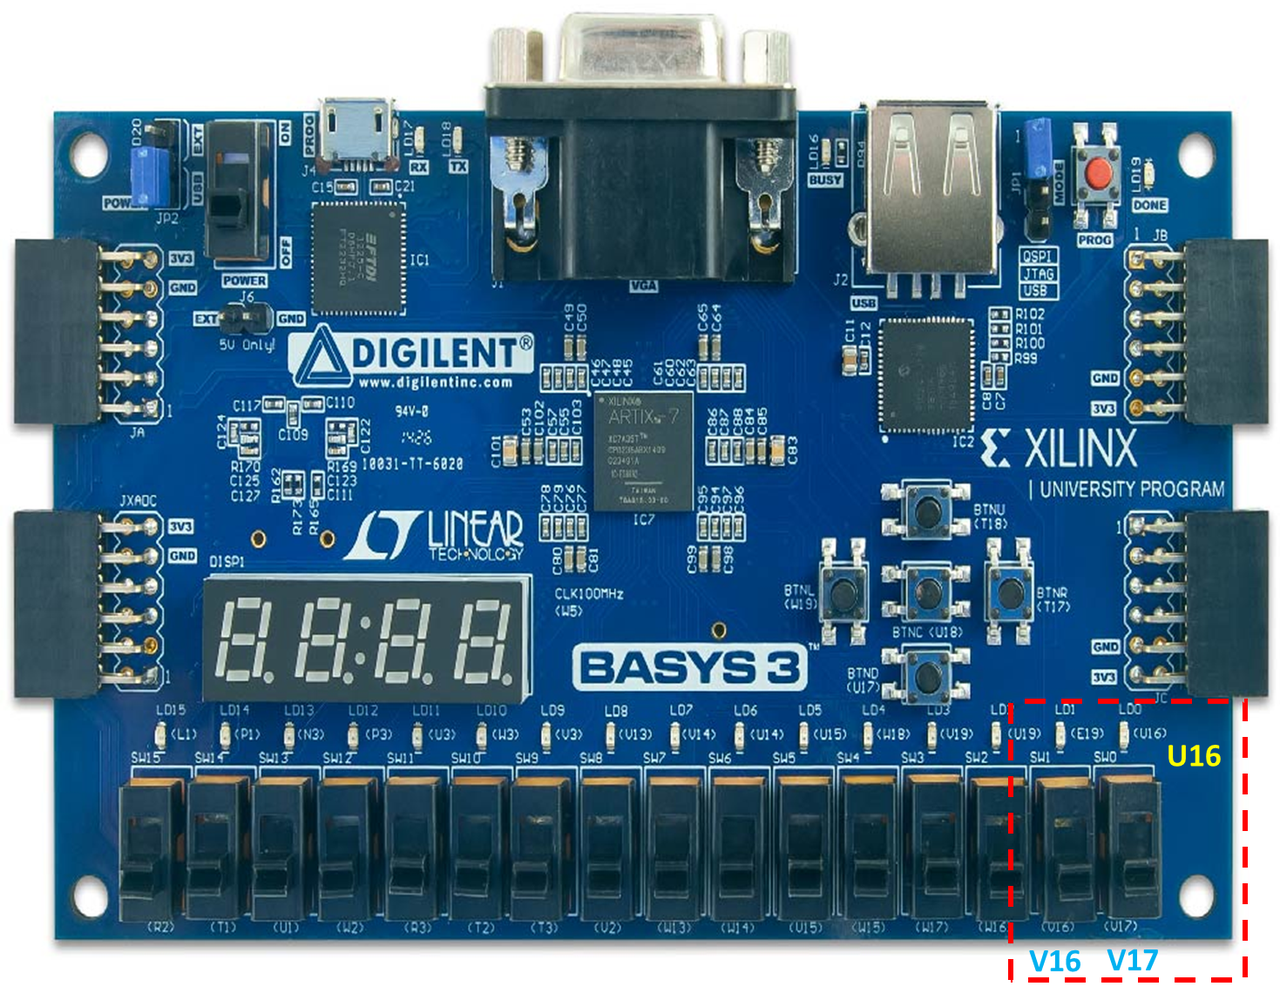

Figure 3: Basys 3 board components and ports (V16, V17, U16)

3. Input – Output connection as per the b3logic.xdc
  a. Input: a: SW0: V16, b: SW1: V17
  b. Output: y: LD0: U16


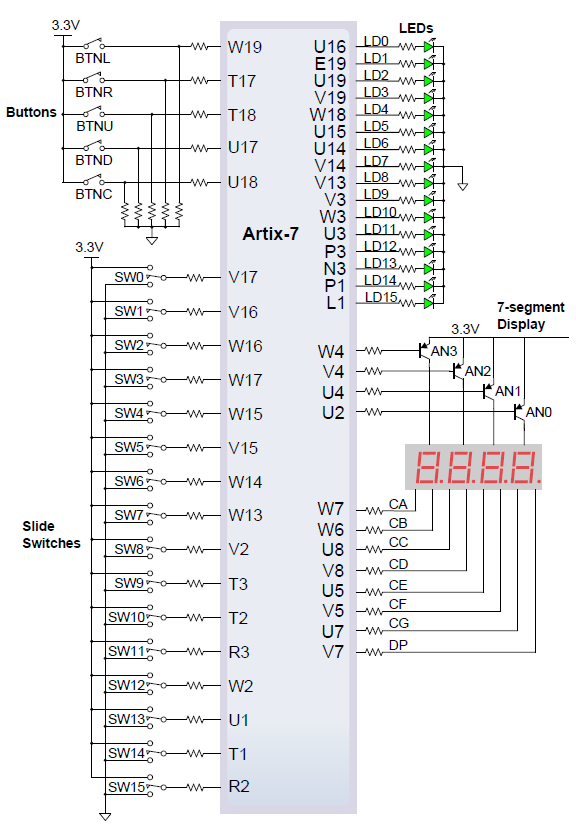

Figure 4: Basys 3 port list

4. Launch Vivado 2023.1
5. Under Quick Start -> Create Project
6. Under a New Vivado Project -> Next
7. Under Project Name -> Project Name: b3logic1, Project Location: E:/work/dsl
8. Under Project Name -> Select “Create project subdirectory” -> Next
9. Under Project Type -> Select “RTL Project” -> “Do not specify sources at this time” -> Next
10. Under Default Part -> Under Boards (you need to click on the “Boards”) -> click on the “Refresh” for the first time to load the boards information -> in the Vendor -> Select “digilentinc.com” ->  in the Name -> Select "Basys3” -> You may see File Version 1.1 or 1.2 -> under Status click on installed on the latest version, e.g. 1.2 here -> Next
11. Under New Project Summary -> Check if the setup is correct -> Finish if correct.
12. You will see the Working window as below:


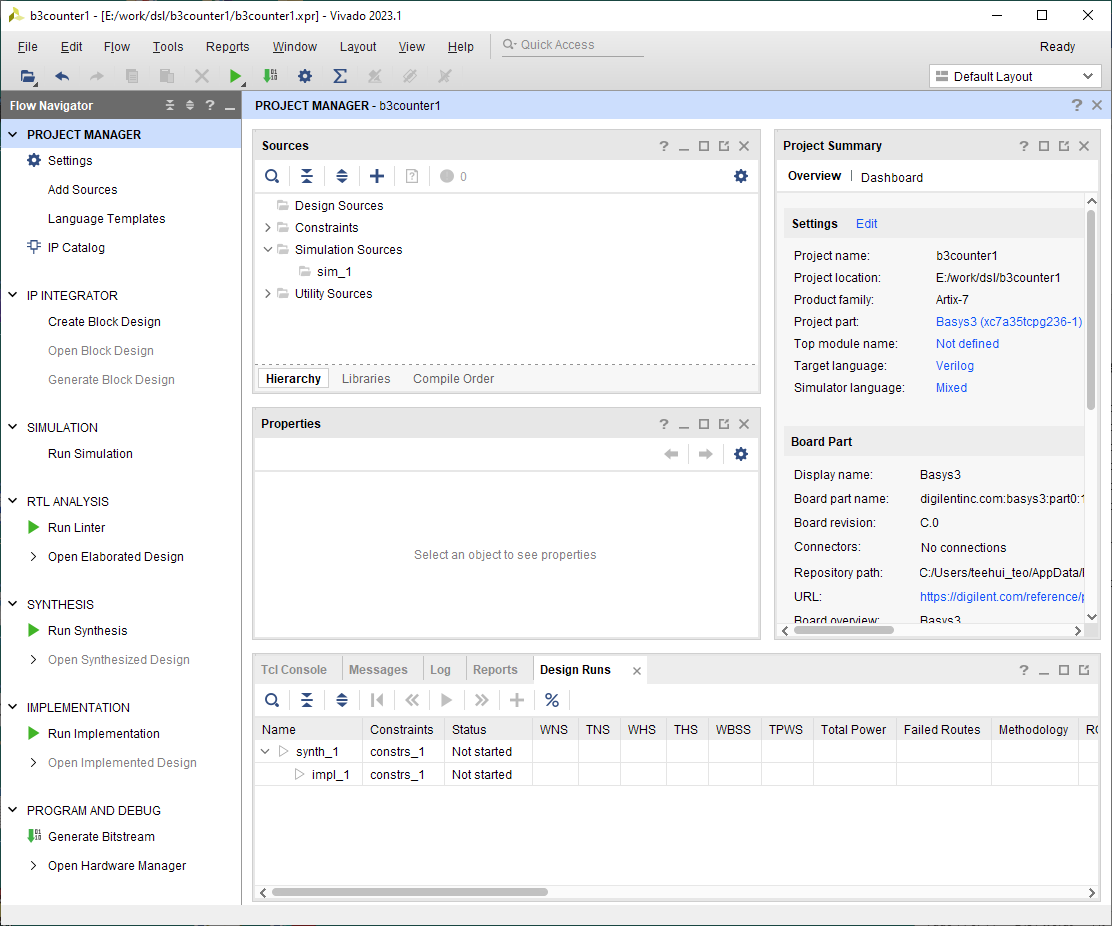

Figure 5: Vivado 2023.1 Flow Navigator

13. Before starting the work here, get ready the Verilog file (b3logic.v), and the constrain file (b3logic.xdc). The testbench is skipped at this point.
14. Under Flow Navigator -> PROJECT MANAGER -> Settings -> Add Sources -> Select “Add or create design sources” -> Next
15. Under Add or Create Design Sources -> Add Files -> add the “b3logic.v” (you can also Create Files, and copy the content from the b3logic.v) -> OK -> Select “Copy sources into project” -> Finish
16. Under Flow Navigator -> PROJECT MANAGER -> Settings -> Add Sources -> Select “Add or create simulation sources” -> Next
17. Under Add or Create Simulation Sources -> Add Files -> add the “b3logic_tb.v” (you can also Create Files, and copy the content from the b3logic_tb.v) -> OK -> Select “Copy sources into project” -> Finish
18. Under PROJECT MANAGER -> Settings -> Add Sources -> Select “Add or create constraints” -> Next
19. Under Add or Create Constraints -> Add Files -> add the “b3logic.xdc” -> OK -> Select “Copy sources into project” -> Finish
20. Under Flow Navigator -> RTL ANALYSIS -> Run Linter -> You can Open Elaborated Design to view the Project Summary, and Schematic
21. Under Flow Navigator -> SYNTHESIS -> Run Synthesis -> Under Runs -> OK (the synthesis can take a couple of minutes, look at the Top Right corner, spinning cycle) -> If there is no error, under “Synthesis Completed” -> Select Run Implementation -> OK -> Under Runs -> OK (we skip to open the synthesis design to save time, the implementation also take a couple of minutes) -> If there is no error, under “Implementation successfully completed” -> Cancel (to process to the Program and Debug, skip Open Implemented Design etc. )
22. You need to connect the Basys 3 board to your computer or laptop, and make sure the communication link is up. Turn on the POWER Switch, the board should light up.
  
  a. In the Window OS, search Device Manager -> Under Ports (COM & LPT) -> check if Communication Port (COM1) is ready.

23. Under Flow Navigator -> PROGRAM AND DEBUG -> Generate Bitstream -> Under Launch Runs -> OK -> (it will take a couple of minutes to generate Bitstream.) -> under “Bitstream Generation successfully completed.” -> Cancel.
24. Under Flow Navigator -> PROGRAM AND DEBUG -> Open Hardware Manager -> Open Target -> Auto Connect -> it takes a while to link to the boards, you should see the device under Hardware, e.g.  xc7a35t -> Program Device -> xc7a35t_0 -> Under Program Device (you should see b3logic.bit file, and the Basys 3 board is now on.) -> click Program -> LD0 will be turned on, when both SW1, and SW0 are turn on, as a AND gate. You can modify the AND gate to other logic gate also.

25. Handson Task (T01 Basys 3-Group): You need to design logic function as the following:
  1. 1-input NOT gate
  2. 2-inputs AND gate
  3. 2-inputs OR gate
  4. 2-inputs NAND gate
  5. 2-inputs NOR gate
  6. 2-inputs XOR gate
  7. 2-inputs XNOR gate
  8. A Boolean expression:$$y=a\cdot b + c$$
  (output y is a function of a (AND) b (OR) c.)

Please refer to the below Submission.

### Submission


#### T01 (Basys 3-Group)

This is a group work. Only one member needs to submit the below materials to the edimension. The marking rubric is also in the submission folder: T01 (Basys 3-Group).

1. A self-content ipynb file together with Google Colab link and Github link. (Please work on Google Colab and Github, download the ipynb file and submit to edimension. Submission to edimension is required due to the Accreditation / Audit needs proof of submitted works).
  
  a. Verilog codes (module, testbench, waveform, AI prompt, etc.).
  
  b. Include a demonstration video for at least one of the designs, (less than 1 minute, mp4 format).
  
  c. A brief report (part of the ipynb) documenting your design, Python code (eg. logic expression, AI codes), the challenges you encounter, and any lessons learned during implementation.
  
2. Instructor GitHub: pe8sutd, pe8sutd@gmail.com

### Deadline:
The assignment's due date is set in the edimension submission folder.

### Grading


Your assignment will be graded based on the functionality of the stopwatch, the clarity of your Verilog code, and the quality of your documentation. Bonus points may be awarded for additional features or creative implementations.

This assignment should provide students with a practical hands-on experience in FPGA design and help them become familiar with the Basys 3 FPGA board's resources and basic input/output operations.